# Grover's search algorithm

Grover's algorithm starts with the input state $\ket{00..0}$, then we apply an Hadmard gate on each input to obtain the initial superpositiion state $\ket{\psi}$

$$\ket{\psi} = H^{\otimes n} \ket{0}^{\otimes n} = \frac{1}{\sqrt{N}} \sum_{x = 0}^{N-1}\ket{x}$$

The Grover algorithm then consist of repeatling applying a subrutine called Grover's iteration, which consist in 2 operation:
1. **Oracle Operation (O)**: 
   - Flips the sign of the marked state(s)
   - Acts as: $O\ket{x} = (-1)^{f(x)}\ket{x}$
   - Where $f(x) = 1$ for solutions, $f(x) = 0$ otherwise

2. **Diffusion Operator (D)**:
   - Performs inversion about the average
   - Can be written as: $D = 2\ket{\psi}\bra{\psi} - I$
   - Also known as Grover diffusion operator
   
Thus, the Grover iteration can be written as

$$ G = DO = (2\ket{\psi}\bra{\psi} - I)O$$


In [3]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt 
import qiskit.quantum_info.operators as operators

target = "100"      # target state to search for        
n = len(target)       

qc = QuantumCircuit(n)

# Create the starting state as superposition
qc.h(range(n))

We construct the Grover's Oracle which acts like $$O \ket{x} = (-1)^{f(x)} \ket{x},$$ this operator flips the sign of the target state, while keeping invariant the others.\
In practice it can be represented as a unitary operator (i.e $U^{\dagger}U = I$), for example a diagonal matrix that has a -1 in the position corresponding to the target bitstring.\
For exemple, if we want to mark the state $\ket{000}$, which in decimal is equal to 0, we need to put the 1st element on the diagonal as -1.
$$ O = \begin{bmatrix}
-1 &  &  &  &  &  &  &  \\
 & 1 &  &  &  &  &  &  \\
 &  & 1 &  &  &  &  &  \\
 &  &  & 1 &  &  &  &  \\
 &  &  &  & 1 &  &  &  \\
 &  &  &  &  & 1 &  &  \\
 &  &  &  &  &  & 1 &  \\
 &  &  &  &  &  &  & 1
\end{bmatrix}$$

In [2]:
target_index = int(target, 2)  # binary → decimal (000 -> 0)
oracle = np.identity(2**n)      # start with identity matrix (size 2^n x 2^n)
oracle[target_index, target_index] = -1  # flip the sign of the target state

print("Oracle matrix:")
print(oracle)

Oracle matrix:
[[ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.]]


## Grover Diffuser

We know the form of $\ket{\psi}=H^{\otimes n}\ket{0}$, therefore the Grover diffusion operator can be rewritten as:
$$D = 2\ket{\psi}\bra{\psi} - I = H^{\otimes n}(2\ket{0...0}\bra{0...0}-I)H^{\otimes n}$$

We can notice that at the start and at the end of the operations we need to apply the Hadmard gate to all the qubits, and now the key par is to understand how to implement in Qiskit $(2\ket{0...0}\bra{0...0}-I)$.\
Let's start from the base 1-qubit case $\ket{0}$, in that case:
$$\ket{0} = \begin{bmatrix}
1 \\0
\end{bmatrix} , \bra{0} = \begin{bmatrix}
1 &  0
\end{bmatrix} $$
And hence we have:
$$2\ket{0}\bra{0}-I = \begin{bmatrix}
2 & 0 \\
0 & 0
\end{bmatrix}-\begin{bmatrix}
1 & 0 \\
 0& 1
\end{bmatrix}=\begin{bmatrix}
1 & 0 \\
 0& -1
\end{bmatrix}$$
which is the Z-Gate! We repeat the process for a 2 qubit state and we have:
$$\ket{00} = \begin{bmatrix}
1 \\
 0\\
 0\\
0
\end{bmatrix}, \bra{00} = \begin{bmatrix}
1 & 0 & 0 &0 
\end{bmatrix}$$
$$2\ket{00}\bra{00}-I_4 = \begin{bmatrix}
2 &  0& 0 & 0 \\
0 & 0 & 0 &  0\\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0
\end{bmatrix}-\begin{bmatrix}
1 & 0 & 0 & 0 \\
 0& 1  & 0 & 0 \\
 0& 0 & 1 & 0 \\
0 & 0 & 0 & 1
\end{bmatrix}=\begin{bmatrix}
1 & 0 & 0 & 0 \\
 0& -1  & 0 & 0 \\
 0& 0 & -1 & 0 \\
0 & 0 & 0 & -1
\end{bmatrix}$$
We repeat the process for a 3 qubit state and we have:
$$\ket{000} = \begin{bmatrix}
1 \\
 0\\
 0\\
0 \\
0 \\
0 \\
0 \\
0
\end{bmatrix}, \bra{000} = \begin{bmatrix}
1 & 0 & 0 &0 & 0 & 0 & 0 & 0
\end{bmatrix}$$
$$\ket{000}\bra{000} =
\begin{bmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0
\end{bmatrix}.$$

$$2\ket{000}\bra{000} - I_8 =
\begin{bmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & -1 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & -1 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & -1 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & -1 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & -1 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & -1 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & -1
\end{bmatrix}
= \operatorname{diag}(1, -1, -1, -1, -1, -1, -1, -1).$$

By induction we obtain that the matrix describing the operation is a diagonal matrix with the firs element of diagonal put as 1 and the others as -1.
$$\begin{bmatrix}
1 &  &  &  &  &  \\
 & -1 &  &  &  &  \\
 &  & -1 &  &  &  \\
 &  &  & ... &  &  \\
 &  &  &  & ... &  \\
 &  &  &  &  & -1
\end{bmatrix}$$

The trivial way to implement the Grover diffuser is then to apply Hadmard gates to all qubits before and after this matrix, and import this matrix in the circuit like we did for the Oracle.

In [4]:
def diffuser_matrix(n):
    """Return the Grover diffuser operator on n qubits."""

    qc = QuantumCircuit(n,)

    # Step 1: Apply Hadamard and X to all qubits
    qc.h(range(n))

    diffuser_matrix = -1 * np.identity(2**n)
    diffuser_matrix[0, 0] = 1

    diffuser_gate = operators.Operator(diffuser_matrix).to_instruction()
    qc.append(diffuser_gate, range(n))

    # Step 3: Reverse Step 1
    qc.h(range(n))

    return qc.to_gate(label="Diffuser")

The second way to implement the $2\ket{0...0}\bra{0...0}-I$ operation is through Qiskit gates.\
Recall that for a single qubit, the operator $2\ket{0}\bra{0}-I$ corresponds to the Pauli-Z gate, extending this idea we analyze the multi-controlled Z gate, its matrix in computational basis is:
$$
MCZ = \begin{bmatrix}
1 &  &  &  &  &  \\
 & 1 &  &  &  &  \\
 &  & 1 &  &  &  \\
 &  &  & .. &  &  \\
 &  &  &  & .. &  \\
 &  &  &  &  & -1
\end{bmatrix}$$
This gate corresponds to the operator $I-2\ket{11..1}\bra{11..1}$ and it flips only the $\ket{11..1}$ state, meanwhile we want that all the state expect the $\ket{00..0}$ are flipped, so we can use X gate to all the qubits before the CCZ so that the new $\ket{11..1}$ correspond to the original $\ket{00..0}$ and then we apply again X gate to all the qubits to return to the original state.\

From this idea, let's try to compute 
$$
X^{\otimes n}\,MCZ\,X^{\otimes n}.
$$

Substitute $MCZ = I - 2\ket{11\dots1}\bra{11\dots1}$:

$$
X^{\otimes n}\,MCZ\,X^{\otimes n}
= X^{\otimes n}\left(I - 2\ket{11\dots1}\bra{11\dots1}\right)X^{\otimes n}.
$$

Since $X^{\otimes n}$ is unitary and $(X^{\otimes n})^2 = I$,

$$
X^{\otimes n}\,I\,X^{\otimes n} = I.
$$

Moreover

$$
X^{\otimes n}\,\ket{11\dots1}\bra{11\dots1}\,X^{\otimes n}
= (X^{\otimes n}\ket{11\dots1})(\bra{11\dots1}X^{\otimes n})
= \ket{00\dots0}\bra{00\dots0}.
$$

Therefore:

$$
X^{\otimes n}\,MCZ\,X^{\otimes n}
= I - 2\ket{00\dots0}\bra{00\dots0}.
$$

This operator is the opposite of the one that we want $2\ket{00..0}\bra{00..0}-I = -(I-2\ket{00..0}\bra{00..0})$, there is a global phase difference of -1, but this phase difference doesn't have any physical effect of measurments because, in quantum mechanics, measurement probabilities depend on absolute squares.
$$
P(\phi|\psi) = |\langle \phi | \psi \rangle|^2.
$$

If we apply a global phase $ e^{i\theta} $ to the state $ \ket{\psi} $:

$$
|\langle \phi | (e^{i\theta}\psi) \rangle|^2 
= |e^{i\theta}\langle \phi|\psi\rangle|^2 
= |e^{i\theta}|^2 |\langle \phi|\psi\rangle|^2 
= |\langle \phi|\psi\rangle|^2,
$$

because $ |e^{i\theta}|^2 = 1 $.

Therefore, the probabilities remain identical — a global phase cannot be detected by any measurement.\
Qiskit unfortunatley does not have a MCZ gate function, therefore we have to create it using a multi-controlled X gate (MCX) together with Hadamard gates on the target qubit (the last one).
$$
H Z H = X, \quad \text{and} \quad H X H = Z.
$$

In [5]:
def Grover_diffuser(n):
    """Return the Grover diffuser operator on n qubits."""

    qc = QuantumCircuit(n,)

    # Step 1: Apply Hadamard and X to all qubits
    qc.h(range(n))

    # Step 2: Apply multi-controlled Z gate and X to all qubits
    qc.x(range(n))
    qc.h(n - 1)
    qc.mcx(list(range(n - 1)), n - 1)  # multi-controlled X
    qc.h(n - 1)
    qc.x(range(n))

    # Step 3: Undo the first step
    qc.h(range(n))

    # Convert to a named gate
    return qc.to_gate(label="Diffuser")

Now we can finally put toghether the two pieces of Grover iteration and create the final circuit.\
We also know that we nee do to perform $\frac{\pi}{4}\sqrt{2^n}$ Grover iterations (and thus oracle calls) must be performed in order to obtain a solution to the search problem with high probability, a quadratic improvement over the O(N/M) oracle calls required classically.\
In the case of n<=2 only one iteration is required to find the soloution with centrainity.

In [7]:
# Determine the number of iterations
if n <= 2:
    num_iterations = 1
else:
    num_iterations = int(np.round(np.pi/4 * np.sqrt(2**n)))

for _ in range(num_iterations):
    # Append the oracle
    oracle_gate = operators.Operator(oracle).to_instruction()
    qc.append(oracle_gate, range(n))
    
    # Append the diffuser
    qc.append(Grover_diffuser(n), range(n))

qc.measure_all()

qc.draw('mpl')  


MissingOptionalLibraryError: "The 'pylatexenc' library is required to use 'MatplotlibDrawer'. You can install it with 'pip install pylatexenc'."

Then, we proceed to simulate the result of the measurement of our quantum circuit and plot the histogram of the found states.

{'101': 7, '011': 9, '111': 10, '110': 7, '100': 966, '001': 6, '010': 6, '000': 13}


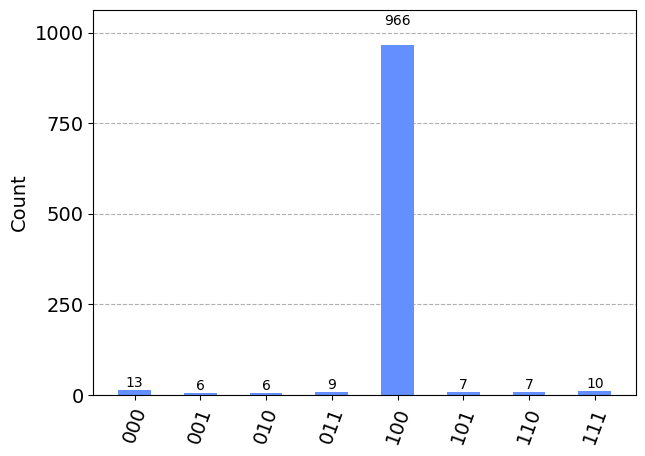

In [ ]:
from qiskit import transpile
# Use Aer's qasm_simulator
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_histogram

backend = AerSimulator()
qc_compiled = transpile(qc, backend)

job_sim = backend.run(qc_compiled, shots=1024)
result_sim = job_sim.result()

counts = result_sim.get_counts(qc_compiled)
print(counts)

plot_histogram(counts)